In [41]:
import pandas as pd
import numpy as np

def filtrar_extremos(ruta_archivo):
    """
    Filtra extremos con >900 minutos y posiciones RW/LW
    Mantiene TODAS las columnas originales
    """
    print("🔄 Cargando datos...")
    df = pd.read_csv(ruta_archivo)
    
    print(f"📊 Dataset original:")
    print(f"   - Total jugadores: {len(df):,}")
    print(f"   - Total columnas: {len(df.columns)}")
    print(f"   - Rango minutos: {df['minutes_on_field'].min():.0f} - {df['minutes_on_field'].max():.0f}")
    
    # FILTRO 1: Más de 900 minutos
    print(f"\n🔄 Aplicando filtro de minutos...")
    df_min_filtrado = df[df['minutes_on_field'] > 900].copy()
    print(f"   - Jugadores con >900 min: {len(df_min_filtrado):,}")
    print(f"   - Eliminados: {len(df) - len(df_min_filtrado):,}")
    
    # FILTRO 2: Posiciones RW/LW (con posibles números)
    print(f"\n🔄 Aplicando filtro de posiciones...")
    
    # Convertir a string y limpiar
    df_min_filtrado['primary_position'] = df_min_filtrado['primary_position'].astype(str).str.lower().str.strip()
    
    # Ver todas las posiciones únicas antes del filtro
    posiciones_unicas = df_min_filtrado['primary_position'].unique()
    print(f"   - Posiciones únicas encontradas: {len(posiciones_unicas)}")
    print(f"   - Posiciones: {sorted(posiciones_unicas)}")
    
    # Filtro más específico para RW/LW
    extremos = df_min_filtrado[
        (df_min_filtrado['primary_position'].str.startswith('rw')) |
        (df_min_filtrado['primary_position'].str.startswith('lw'))
    ].copy()
    
    print(f"\n✅ RESULTADO FINAL:")
    print(f"   - Extremos encontrados: {len(extremos):,}")
    print(f"   - Columnas mantenidas: {len(extremos.columns)} (todas)")
    
    # Mostrar distribución de posiciones encontradas
    print(f"\n📋 Distribución de posiciones de extremos:")
    distribucion_pos = extremos['primary_position'].value_counts()
    for pos, count in distribucion_pos.items():
        print(f"   - {pos}: {count} jugadores")
    
    # Estadísticas básicas de los extremos filtrados
    print(f"\n📈 Estadísticas de extremos filtrados:")
    print(f"   - Edad promedio: {extremos['age'].mean():.1f} años")
    print(f"   - Rango edad: {extremos['age'].min():.0f} - {extremos['age'].max():.0f}")
    print(f"   - Minutos promedio: {extremos['minutes_on_field'].mean():.0f}")
    print(f"   - Partidos promedio: {extremos['total_matches'].mean():.1f}")
    
    # Mostrar algunos nombres para verificar
    print(f"\n👥 Algunos ejemplos de extremos encontrados:")
    muestra = extremos[['name', 'primary_position', 'age', 'minutes_on_field', 'current_team_name']].head(10)
    for i, row in muestra.iterrows():
        print(f"   - {row['name']} ({row['primary_position']}) - {row['age']}años, {row['minutes_on_field']:.0f}min - {row['current_team_name']}")
    
    return extremos

def analizar_columnas_clustering(extremos_df):
    """
    Analiza las columnas disponibles para clustering según el perfil buscado
    """
    print(f"\n🔍 ANÁLISIS DE COLUMNAS PARA CLUSTERING")
    print(f"=" * 50)
    
    # Categorías de variables para el perfil buscado
    categorias = {
        'REGATE_DRIBBLING': [
            'dribbles_avg', 'successful_dribbles_percent', 
            'offensive_duels_avg', 'offensive_duels_won',
            'accelerations_avg'
        ],
        'CENTROS_CROSSES': [
            'crosses_avg', 'accurate_crosses_percent',
            'cross_from_left_avg', 'successful_cross_from_left_percent',
            'cross_from_right_avg', 'successful_cross_from_right_percent',
            'deep_completed_cross_avg'
        ],
        'FINALIZACION_SHOOTING': [
            'shots_avg', 'shots_on_target_percent', 'non_penalty_goal_avg',
            'xg_shot_avg', 'touch_in_box_avg', 'goal_conversion_percent'
        ],
        'CREACION_CREATION': [
            'assists_avg', 'xg_assist_avg', 'xg_assist_avg',
            'shot_assists_avg', 'pre_assist_avg'
        ],
        'PASES_PASSING': [
            'passes_to_final_third_avg', 'accurate_passes_to_final_third_percent',
            'pass_to_penalty_area_avg', 'accurate_pass_to_penalty_area_percent',
            'through_passes_avg', 'successful_through_passes_percent'
        ],
        'POSICION_POSITIONING': [
            'progressive_run_avg', 'successful_attacking_actions_avg'
        ]
    }
    
    # Verificar qué columnas existen
    columnas_totales = extremos_df.columns.tolist()
    
    for categoria, variables in categorias.items():
        print(f"\n📊 {categoria}:")
        existentes = []
        faltantes = []
        
        for var in variables:
            if var in columnas_totales:
                existentes.append(var)
                # Mostrar estadísticas básicas
                media = extremos_df[var].mean()
                mediana = extremos_df[var].median()
                print(f"   ✅ {var}: media={media:.2f}, mediana={mediana:.2f}")
            else:
                faltantes.append(var)
                print(f"   ❌ {var}: NO DISPONIBLE")
        
        print(f"   📈 Disponibles: {len(existentes)}/{len(variables)}")
    
    # Resumen final
    todas_variables = [var for vars_cat in categorias.values() for var in vars_cat]
    disponibles = [var for var in todas_variables if var in columnas_totales]
    
    print(f"\n🎯 RESUMEN FINAL:")
    print(f"   - Variables totales para perfil: {len(todas_variables)}")
    print(f"   - Variables disponibles: {len(disponibles)}")
    print(f"   - Porcentaje disponible: {len(disponibles)/len(todas_variables)*100:.1f}%")
    
    return disponibles, categorias

# FUNCIÓN PRINCIPAL
def main():
    ruta_archivo = "/Users/macmontxinho/Desktop/Teams/Brais/wyscout_scraper/data/raw/1RFEF.csv"
    
    try:
        # Paso 1: Filtrar extremos
        extremos = filtrar_extremos(ruta_archivo)
        
        # Paso 2: Analizar columnas para clustering
        variables_disponibles, categorias = analizar_columnas_clustering(extremos)
        
        print(f"\n✅ FILTRADO COMPLETADO")
        print(f"Dataset listo para clustering con {len(extremos)} extremos")
        
        return extremos, variables_disponibles, categorias
        
    except FileNotFoundError:
        print(f"❌ Error: Archivo no encontrado en {ruta_archivo}")
        return None
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# EJECUTAR
if __name__ == "__main__":
    resultado = main()

🔄 Cargando datos...
📊 Dataset original:
   - Total jugadores: 1,702
   - Total columnas: 142
   - Rango minutos: 0 - 3939

🔄 Aplicando filtro de minutos...
   - Jugadores con >900 min: 875
   - Eliminados: 827

🔄 Aplicando filtro de posiciones...
   - Posiciones únicas encontradas: 27
   - Posiciones: ['amf', 'cb', 'cf', 'dmf', 'gk', 'lamf', 'lb', 'lb5', 'lcb', 'lcb3', 'lcmf', 'lcmf3', 'ldmf', 'lw', 'lwb', 'lwf', 'ramf', 'rb', 'rb5', 'rcb', 'rcb3', 'rcmf', 'rcmf3', 'rdmf', 'rw', 'rwb', 'rwf']

✅ RESULTADO FINAL:
   - Extremos encontrados: 115
   - Columnas mantenidas: 142 (todas)

📋 Distribución de posiciones de extremos:
   - rw: 54 jugadores
   - lw: 49 jugadores
   - lwb: 5 jugadores
   - rwb: 4 jugadores
   - rwf: 2 jugadores
   - lwf: 1 jugadores

📈 Estadísticas de extremos filtrados:
   - Edad promedio: 25.1 años
   - Rango edad: 16 - 38
   - Minutos promedio: 1817
   - Partidos promedio: 28.8

👥 Algunos ejemplos de extremos encontrados:
   - Toni Fernández (rw) - 16.0años, 1806m

🔄 Cargando datos...
📊 Dataset original:
   - Total jugadores: 1,702
   - Total columnas: 142
   - Rango minutos: 0 - 3939

🔄 Aplicando filtro de minutos...
   - Jugadores con >900 min: 875
   - Eliminados: 827

🔄 Aplicando filtro de posiciones...
   - Posiciones únicas encontradas: 27

✅ RESULTADO FINAL:
   - Extremos encontrados: 103
   - Columnas mantenidas: 142 (todas)


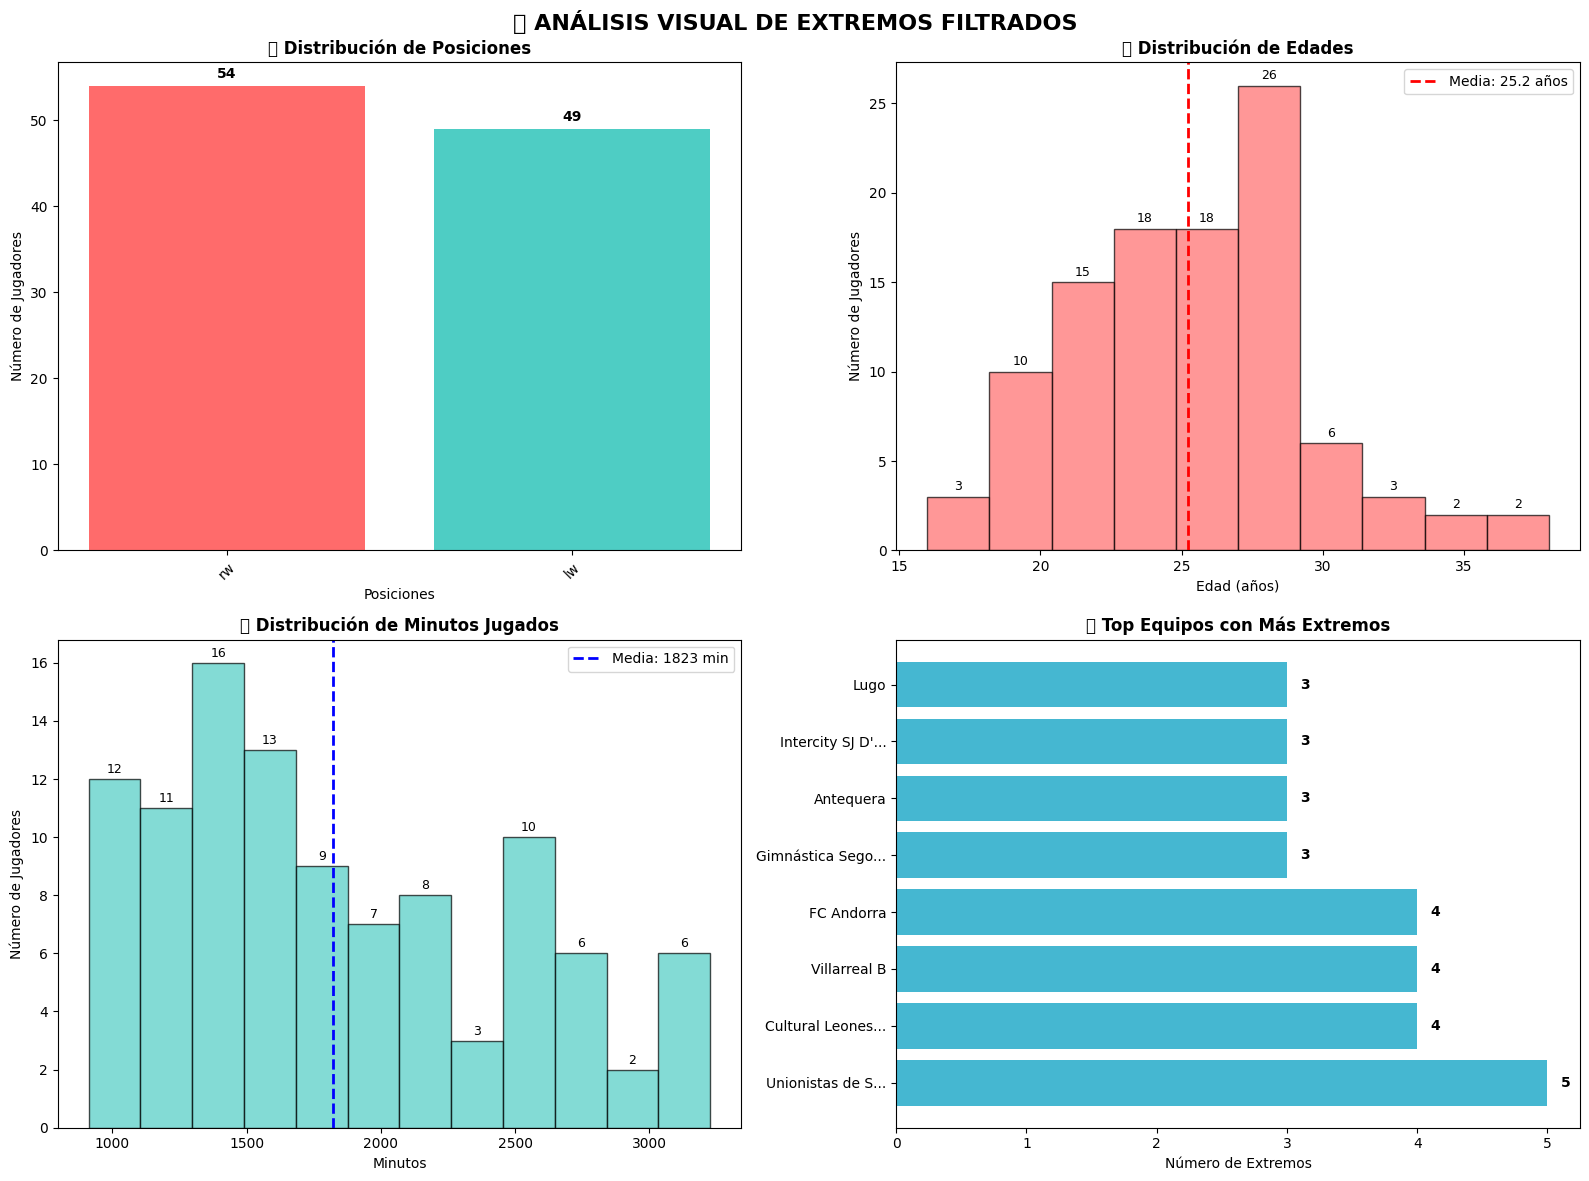


🔍 ANÁLISIS DE COLUMNAS PARA CLUSTERING
🎯 RESUMEN RÁPIDO:
   - Variables totales para perfil: 31
   - Variables disponibles: 31
   - Porcentaje disponible: 100.0%


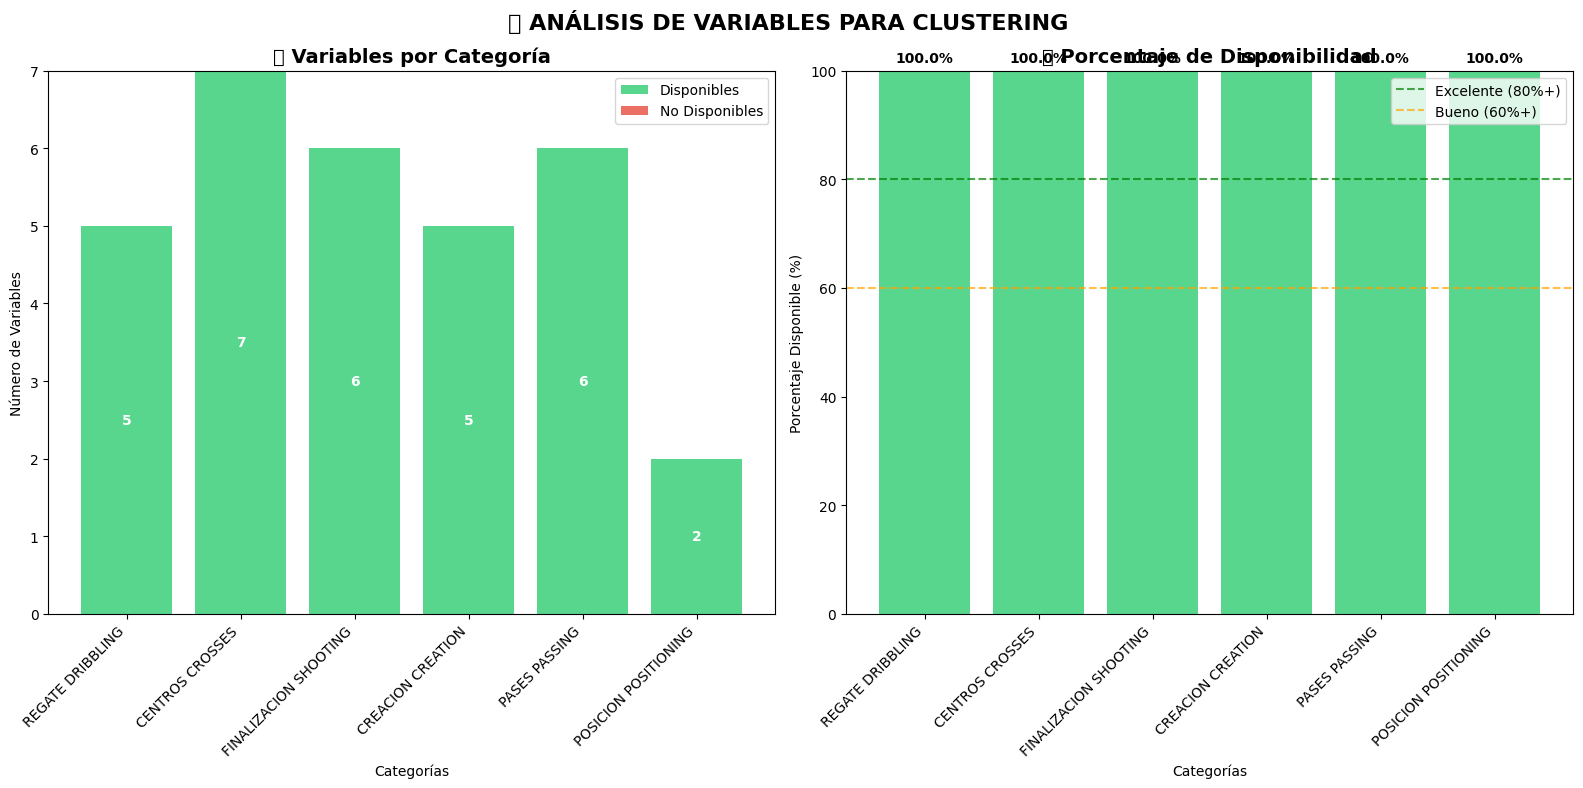

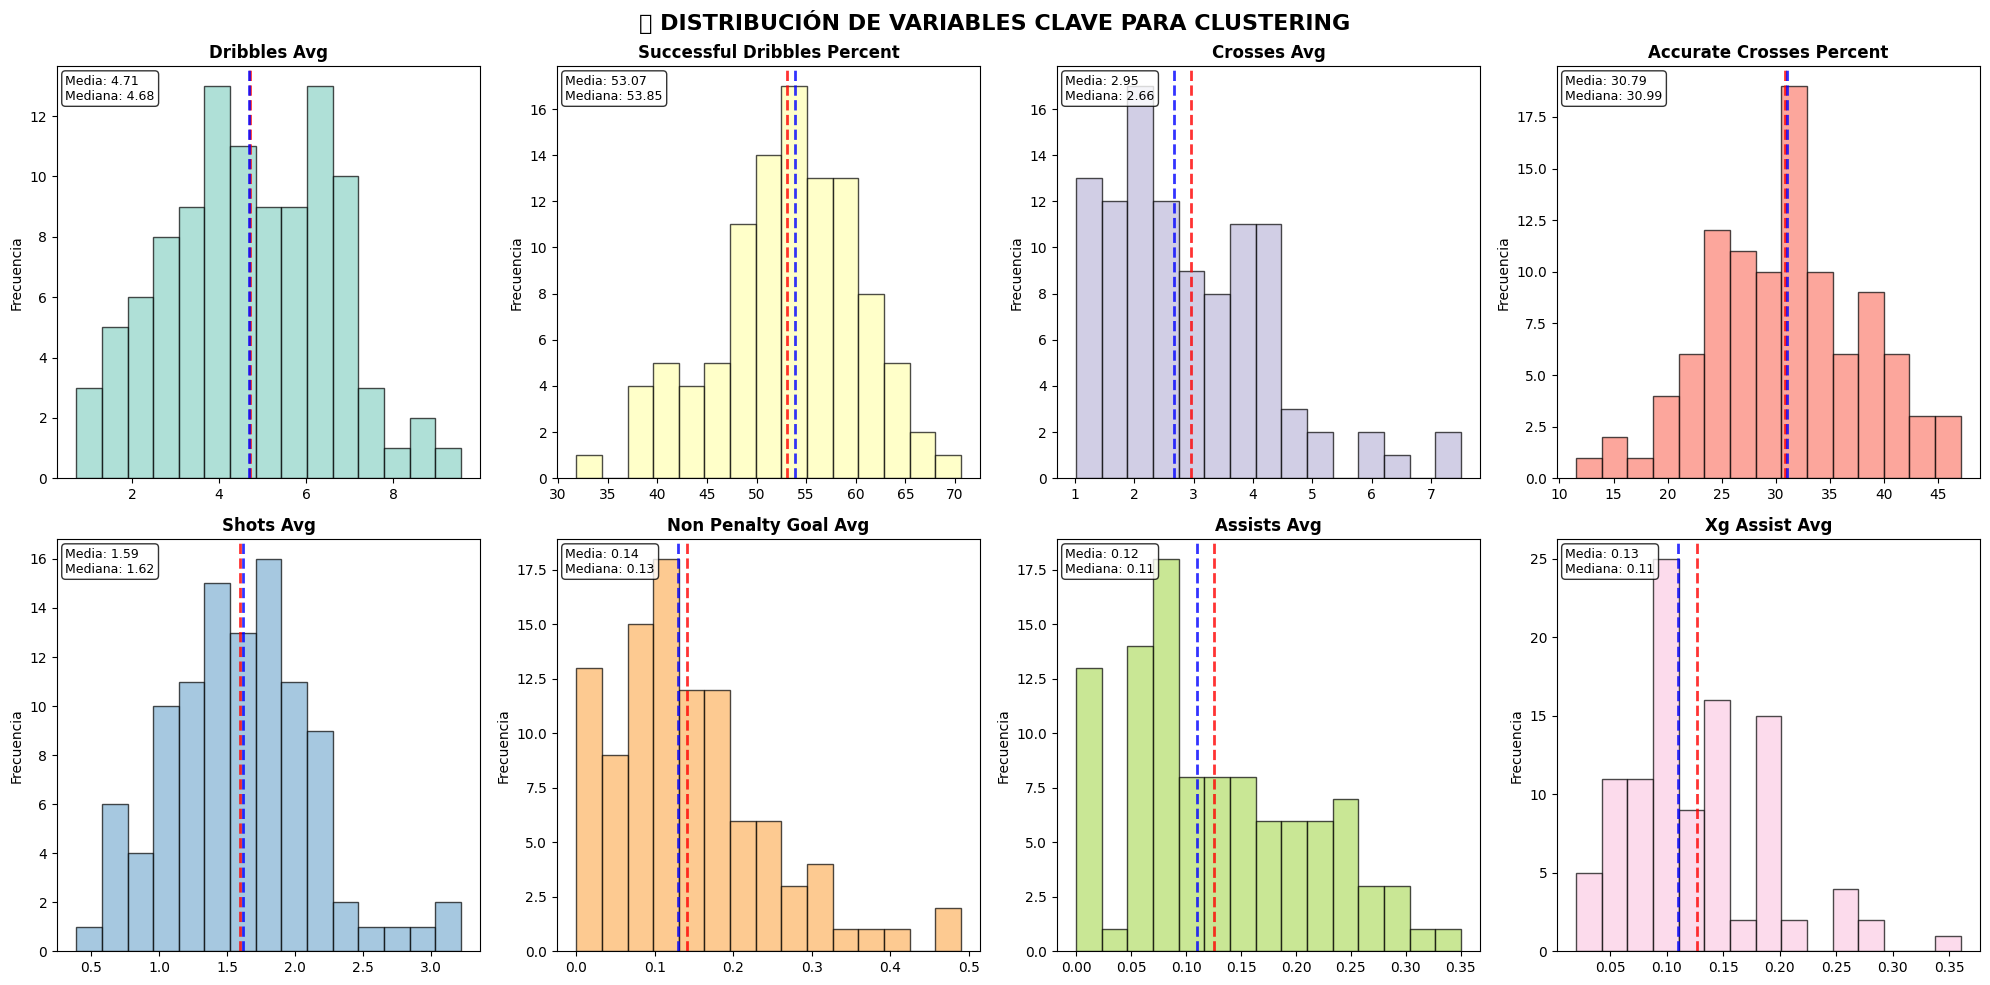


✅ FILTRADO COMPLETADO
Dataset listo para clustering con 103 extremos


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

def filtrar_extremos(ruta_archivo):
    """
    Filtra extremos con >900 minutos y posiciones RW/LW
    Mantiene TODAS las columnas originales
    """
    print("🔄 Cargando datos...")
    df = pd.read_csv(ruta_archivo)
    
    print(f"📊 Dataset original:")
    print(f"   - Total jugadores: {len(df):,}")
    print(f"   - Total columnas: {len(df.columns)}")
    print(f"   - Rango minutos: {df['minutes_on_field'].min():.0f} - {df['minutes_on_field'].max():.0f}")
    
    # FILTRO 1: Más de 900 minutos
    print(f"\n🔄 Aplicando filtro de minutos...")
    df_min_filtrado = df[df['minutes_on_field'] > 900].copy()
    print(f"   - Jugadores con >900 min: {len(df_min_filtrado):,}")
    print(f"   - Eliminados: {len(df) - len(df_min_filtrado):,}")
    
    # FILTRO 2: Posiciones RW/LW (con posibles números)
    print(f"\n🔄 Aplicando filtro de posiciones...")
    
    # Convertir a string y limpiar
    df_min_filtrado['primary_position'] = df_min_filtrado['primary_position'].astype(str).str.lower().str.strip()
    
    # Ver todas las posiciones únicas antes del filtro
    posiciones_unicas = df_min_filtrado['primary_position'].unique()
    print(f"   - Posiciones únicas encontradas: {len(posiciones_unicas)}")
    
    # Filtro EXACTO para SOLO RW y LW
    extremos = df_min_filtrado[
        (df_min_filtrado['primary_position'] == 'rw') |
        (df_min_filtrado['primary_position'] == 'lw')
    ].copy()
    
    print(f"\n✅ RESULTADO FINAL:")
    print(f"   - Extremos encontrados: {len(extremos):,}")
    print(f"   - Columnas mantenidas: {len(extremos.columns)} (todas)")
    
    return extremos

def visualizar_filtrado(extremos_df):
    """
    Crea visualizaciones del proceso de filtrado
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 ANÁLISIS VISUAL DE EXTREMOS FILTRADOS', fontsize=16, fontweight='bold')
    
    # 1. DISTRIBUCIÓN DE POSICIONES
    ax1 = axes[0, 0]
    distribucion_pos = extremos_df['primary_position'].value_counts()
    bars1 = ax1.bar(range(len(distribucion_pos)), distribucion_pos.values, 
                    color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57'])
    ax1.set_title('🎯 Distribución de Posiciones', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Posiciones')
    ax1.set_ylabel('Número de Jugadores')
    ax1.set_xticks(range(len(distribucion_pos)))
    ax1.set_xticklabels(distribucion_pos.index, rotation=45)
    
    # Añadir etiquetas en las barras
    for i, (bar, value) in enumerate(zip(bars1, distribucion_pos.values)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 2. DISTRIBUCIÓN DE EDAD
    ax2 = axes[0, 1]
    n, bins, patches = ax2.hist(extremos_df['age'], bins=10, alpha=0.7, color='#ff6b6b', edgecolor='black')
    ax2.set_title('🎂 Distribución de Edades', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Edad (años)')
    ax2.set_ylabel('Número de Jugadores')
    ax2.axvline(extremos_df['age'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {extremos_df["age"].mean():.1f} años')
    ax2.legend()
    
    # Añadir etiquetas en las barras del histograma
    for i in range(len(patches)):
        if n[i] > 0:
            ax2.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 0.2,
                    f'{int(n[i])}', ha='center', va='bottom', fontsize=9)
    
    # 3. DISTRIBUCIÓN DE MINUTOS
    ax3 = axes[1, 0]
    n3, bins3, patches3 = ax3.hist(extremos_df['minutes_on_field'], bins=12, alpha=0.7, 
                                   color='#4ecdc4', edgecolor='black')
    ax3.set_title('⏱️ Distribución de Minutos Jugados', fontweight='bold', fontsize=12)
    ax3.set_xlabel('Minutos')
    ax3.set_ylabel('Número de Jugadores')
    ax3.axvline(extremos_df['minutes_on_field'].mean(), color='blue', linestyle='--', linewidth=2,
                label=f'Media: {extremos_df["minutes_on_field"].mean():.0f} min')
    ax3.legend()
    
    # Añadir etiquetas
    for i in range(len(patches3)):
        if n3[i] > 0:
            ax3.text(patches3[i].get_x() + patches3[i].get_width()/2, patches3[i].get_height() + 0.1,
                    f'{int(n3[i])}', ha='center', va='bottom', fontsize=9)
    
    # 4. TOP EQUIPOS
    ax4 = axes[1, 1]
    top_equipos = extremos_df['current_team_name'].value_counts().head(8)
    bars4 = ax4.barh(range(len(top_equipos)), top_equipos.values, color='#45b7d1')
    ax4.set_title('🏆 Top Equipos con Más Extremos', fontweight='bold', fontsize=12)
    ax4.set_xlabel('Número de Extremos')
    ax4.set_yticks(range(len(top_equipos)))
    ax4.set_yticklabels([team[:15] + '...' if len(team) > 15 else team for team in top_equipos.index])
    
    # Añadir etiquetas en barras horizontales
    for i, (bar, value) in enumerate(zip(bars4, top_equipos.values)):
        ax4.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                f'{value}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def visualizar_columnas_clustering(extremos_df, categorias):
    """
    Visualiza la disponibilidad de columnas para clustering
    """
    # Preparar datos para visualización
    categoria_nombres = []
    disponibles_count = []
    totales_count = []
    porcentajes = []
    
    columnas_totales = extremos_df.columns.tolist()
    
    for categoria, variables in categorias.items():
        existentes = [var for var in variables if var in columnas_totales]
        categoria_nombres.append(categoria.replace('_', ' '))
        disponibles_count.append(len(existentes))
        totales_count.append(len(variables))
        porcentajes.append(len(existentes)/len(variables)*100)
    
    # Crear visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('🔍 ANÁLISIS DE VARIABLES PARA CLUSTERING', fontsize=16, fontweight='bold')
    
    # 1. Gráfico de barras apiladas
    x_pos = np.arange(len(categoria_nombres))
    bars1 = ax1.bar(x_pos, disponibles_count, label='Disponibles', color='#2ecc71', alpha=0.8)
    bars2 = ax1.bar(x_pos, np.array(totales_count) - np.array(disponibles_count), 
                    bottom=disponibles_count, label='No Disponibles', color='#e74c3c', alpha=0.8)
    
    ax1.set_title('📊 Variables por Categoría', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Categorías')
    ax1.set_ylabel('Número de Variables')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(categoria_nombres, rotation=45, ha='right')
    ax1.legend()
    
    # Añadir etiquetas en las barras
    for i, (bar1, bar2, disp, total) in enumerate(zip(bars1, bars2, disponibles_count, totales_count)):
        # Etiqueta en parte verde (disponibles)
        if disp > 0:
            ax1.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2,
                    f'{disp}', ha='center', va='center', fontweight='bold', color='white')
        # Etiqueta en parte roja (no disponibles)
        no_disp = total - disp
        if no_disp > 0:
            ax1.text(bar2.get_x() + bar2.get_width()/2, 
                    bar1.get_height() + bar2.get_height()/2,
                    f'{no_disp}', ha='center', va='center', fontweight='bold', color='white')
    
    # 2. Gráfico de porcentajes
    colors = ['#2ecc71' if p >= 80 else '#f39c12' if p >= 60 else '#e74c3c' for p in porcentajes]
    bars3 = ax2.bar(x_pos, porcentajes, color=colors, alpha=0.8)
    
    ax2.set_title('📈 Porcentaje de Disponibilidad', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Categorías')
    ax2.set_ylabel('Porcentaje Disponible (%)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(categoria_nombres, rotation=45, ha='right')
    ax2.set_ylim(0, 100)
    
    # Líneas de referencia
    ax2.axhline(y=80, color='green', linestyle='--', alpha=0.7, label='Excelente (80%+)')
    ax2.axhline(y=60, color='orange', linestyle='--', alpha=0.7, label='Bueno (60%+)')
    ax2.legend()
    
    # Añadir etiquetas de porcentaje
    for bar, porcentaje in zip(bars3, porcentajes):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{porcentaje:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def mostrar_top_variables(extremos_df, variables_disponibles):
    """
    Muestra distribución de las variables más importantes
    """
    # Variables clave para el perfil buscado
    variables_clave = [
        'dribbles_avg', 'successful_dribbles_percent',
        'crosses_avg', 'accurate_crosses_percent',
        'shots_avg', 'non_penalty_goal_avg',
        'assists_avg', 'xg_assist_avg'
    ]
    
    # Filtrar solo las que están disponibles
    vars_mostrar = [var for var in variables_clave if var in variables_disponibles]
    
    if len(vars_mostrar) >= 4:
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle('🎯 DISTRIBUCIÓN DE VARIABLES CLAVE PARA CLUSTERING', fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        for i, var in enumerate(vars_mostrar[:8]):
            if i < len(axes):
                data = extremos_df[var].dropna()
                
                # Histograma con estadísticas
                axes[i].hist(data, bins=15, alpha=0.7, color=plt.cm.Set3(i), edgecolor='black')
                axes[i].set_title(f'{var.replace("_", " ").title()}', fontweight='bold')
                axes[i].set_ylabel('Frecuencia')
                
                # Añadir líneas de estadísticas
                mean_val = data.mean()
                median_val = data.median()
                axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, alpha=0.8)
                axes[i].axvline(median_val, color='blue', linestyle='--', linewidth=2, alpha=0.8)
                
                # Leyenda con valores
                axes[i].text(0.02, 0.98, f'Media: {mean_val:.2f}\nMediana: {median_val:.2f}', 
                           transform=axes[i].transAxes, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                           fontsize=9)
        
        # Ocultar axes vacíos
        for i in range(len(vars_mostrar), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

def analizar_columnas_clustering(extremos_df):
    """
    Analiza las columnas disponibles para clustering según el perfil buscado
    """
    print(f"\n🔍 ANÁLISIS DE COLUMNAS PARA CLUSTERING")
    print(f"=" * 50)
    
    # Categorías de variables para el perfil buscado
    categorias = {
        'REGATE_DRIBBLING': [
            'dribbles_avg', 'successful_dribbles_percent', 
            'offensive_duels_avg', 'offensive_duels_won',
            'accelerations_avg'
        ],
        'CENTROS_CROSSES': [
            'crosses_avg', 'accurate_crosses_percent',
            'cross_from_left_avg', 'successful_cross_from_left_percent',
            'cross_from_right_avg', 'successful_cross_from_right_percent',
            'deep_completed_cross_avg'
        ],
        'FINALIZACION_SHOOTING': [
            'shots_avg', 'shots_on_target_percent', 'non_penalty_goal_avg',
            'xg_shot_avg', 'touch_in_box_avg', 'goal_conversion_percent'
        ],
        'CREACION_CREATION': [
            'assists_avg', 'xg_assist_avg', 'xg_assist_avg',
            'shot_assists_avg', 'pre_assist_avg'
        ],
        'PASES_PASSING': [
            'passes_to_final_third_avg', 'accurate_passes_to_final_third_percent',
            'pass_to_penalty_area_avg', 'accurate_pass_to_penalty_area_percent',
            'through_passes_avg', 'successful_through_passes_percent'
        ],
        'POSICION_POSITIONING': [
            'progressive_run_avg', 'successful_attacking_actions_avg'
        ]
    }
    
    # Verificar qué columnas existen
    columnas_totales = extremos_df.columns.tolist()
    todas_variables = [var for vars_cat in categorias.values() for var in vars_cat]
    disponibles = [var for var in todas_variables if var in columnas_totales]
    
    print(f"🎯 RESUMEN RÁPIDO:")
    print(f"   - Variables totales para perfil: {len(todas_variables)}")
    print(f"   - Variables disponibles: {len(disponibles)}")
    print(f"   - Porcentaje disponible: {len(disponibles)/len(todas_variables)*100:.1f}%")
    
    # Crear visualizaciones
    visualizar_columnas_clustering(extremos_df, categorias)
    mostrar_top_variables(extremos_df, disponibles)
    
    return disponibles, categorias

# FUNCIÓN PRINCIPAL
def main():
    ruta_archivo = "/Users/macmontxinho/Desktop/Teams/Brais/wyscout_scraper/data/raw/1RFEF.csv"
    
    try:
        # Paso 1: Filtrar extremos
        extremos = filtrar_extremos(ruta_archivo)
        
        # Paso 2: Visualizar resultados del filtrado
        visualizar_filtrado(extremos)
        
        # Paso 3: Analizar columnas para clustering (visual)
        variables_disponibles, categorias = analizar_columnas_clustering(extremos)
        
        print(f"\n✅ FILTRADO COMPLETADO")
        print(f"Dataset listo para clustering con {len(extremos)} extremos")
        
        return extremos, variables_disponibles, categorias
        
    except FileNotFoundError:
        print(f"❌ Error: Archivo no encontrado en {ruta_archivo}")
        return None
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# EJECUTAR
if __name__ == "__main__":
    resultado = main()

🚀 INICIANDO ANÁLISIS DE CLUSTERING
🔍 VERIFICANDO VARIABLES SELECCIONADAS
✅ dribbles_avg
✅ successful_dribbles_percent
✅ crosses_avg
✅ accurate_crosses_percent
✅ deep_completed_cross_avg
✅ shots_avg
✅ shots_on_target_percent
✅ xg_shot_avg
✅ non_penalty_goal_avg
✅ assists_avg
✅ xg_assist_avg
✅ shot_assists_avg
✅ pre_assist_avg

📊 RESUMEN:
Variables encontradas: 13/13
Variables faltantes: 0
✅ Datos limpios, listos para clustering

📈 ANÁLISIS DE CORRELACIONES
Correlación promedio: 0.142
Correlación máxima: 0.870
Variables muy correlacionadas (>0.7): 2


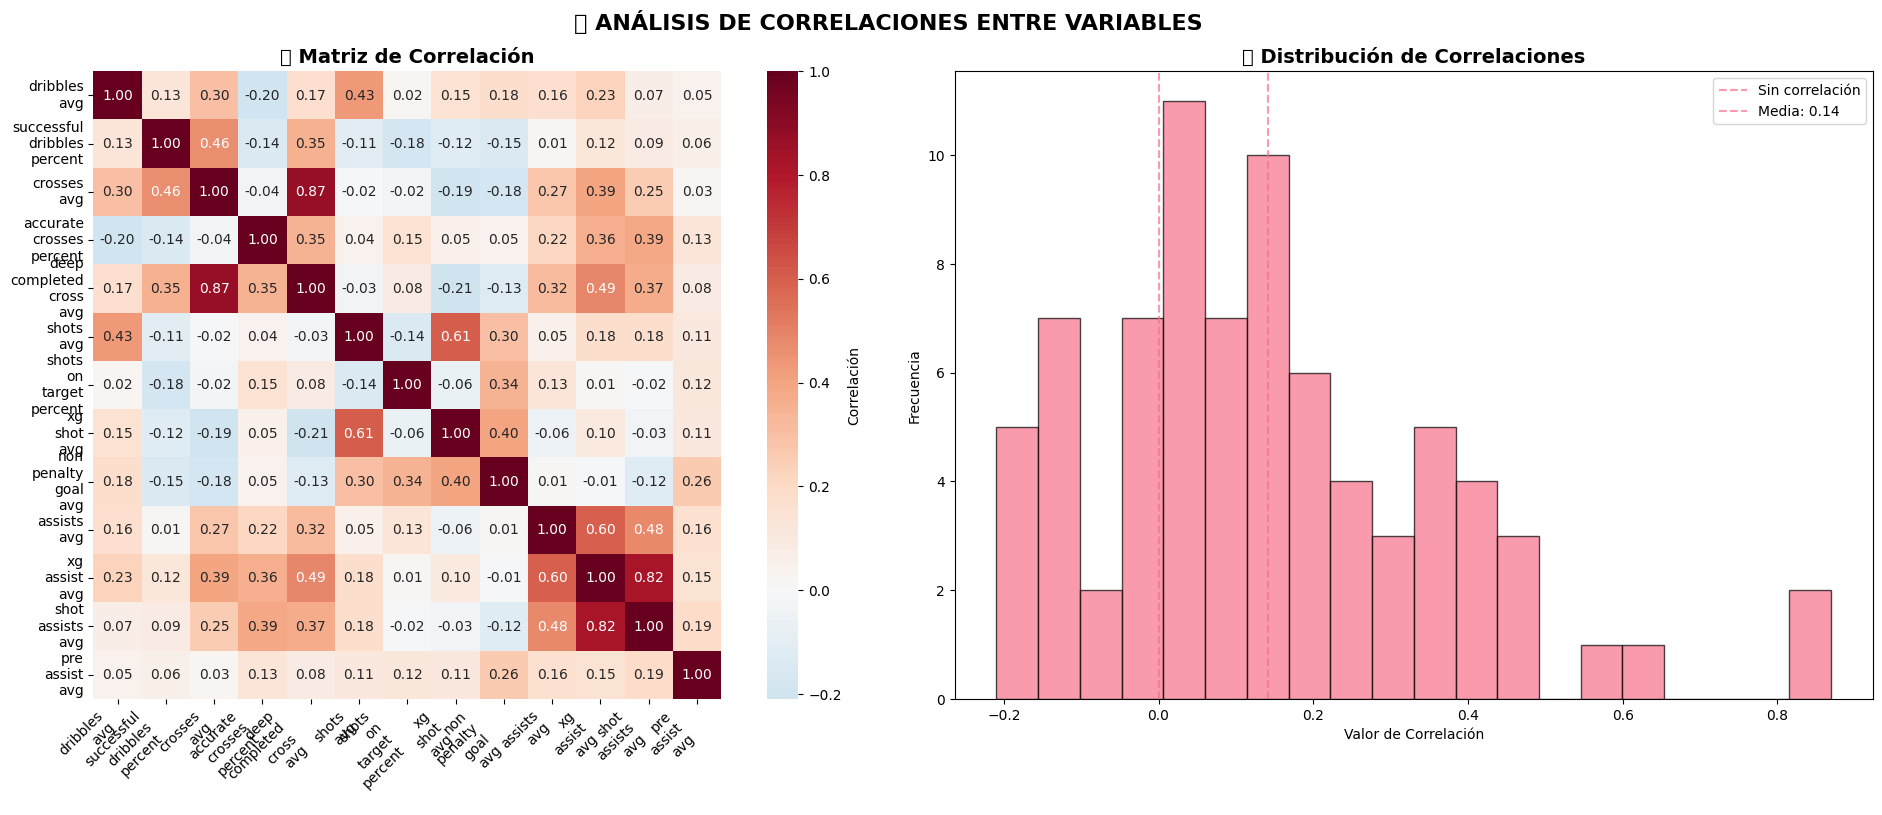


⚙️ APLICANDO MÉTODO DEL CODO
✅ Datos normalizados (StandardScaler)
Shape final: (103, 13)

🔄 Calculando clusters de 2 a 12...
K= 2: Inercia=      1109, Silhouette=0.185
K= 3: Inercia=       997, Silhouette=0.143
K= 4: Inercia=       919, Silhouette=0.106
K= 5: Inercia=       877, Silhouette=0.097
K= 6: Inercia=       829, Silhouette=0.098
K= 7: Inercia=       796, Silhouette=0.114
K= 8: Inercia=       764, Silhouette=0.112
K= 9: Inercia=       723, Silhouette=0.115
K=10: Inercia=       698, Silhouette=0.114
K=11: Inercia=       666, Silhouette=0.107
K=12: Inercia=       632, Silhouette=0.108


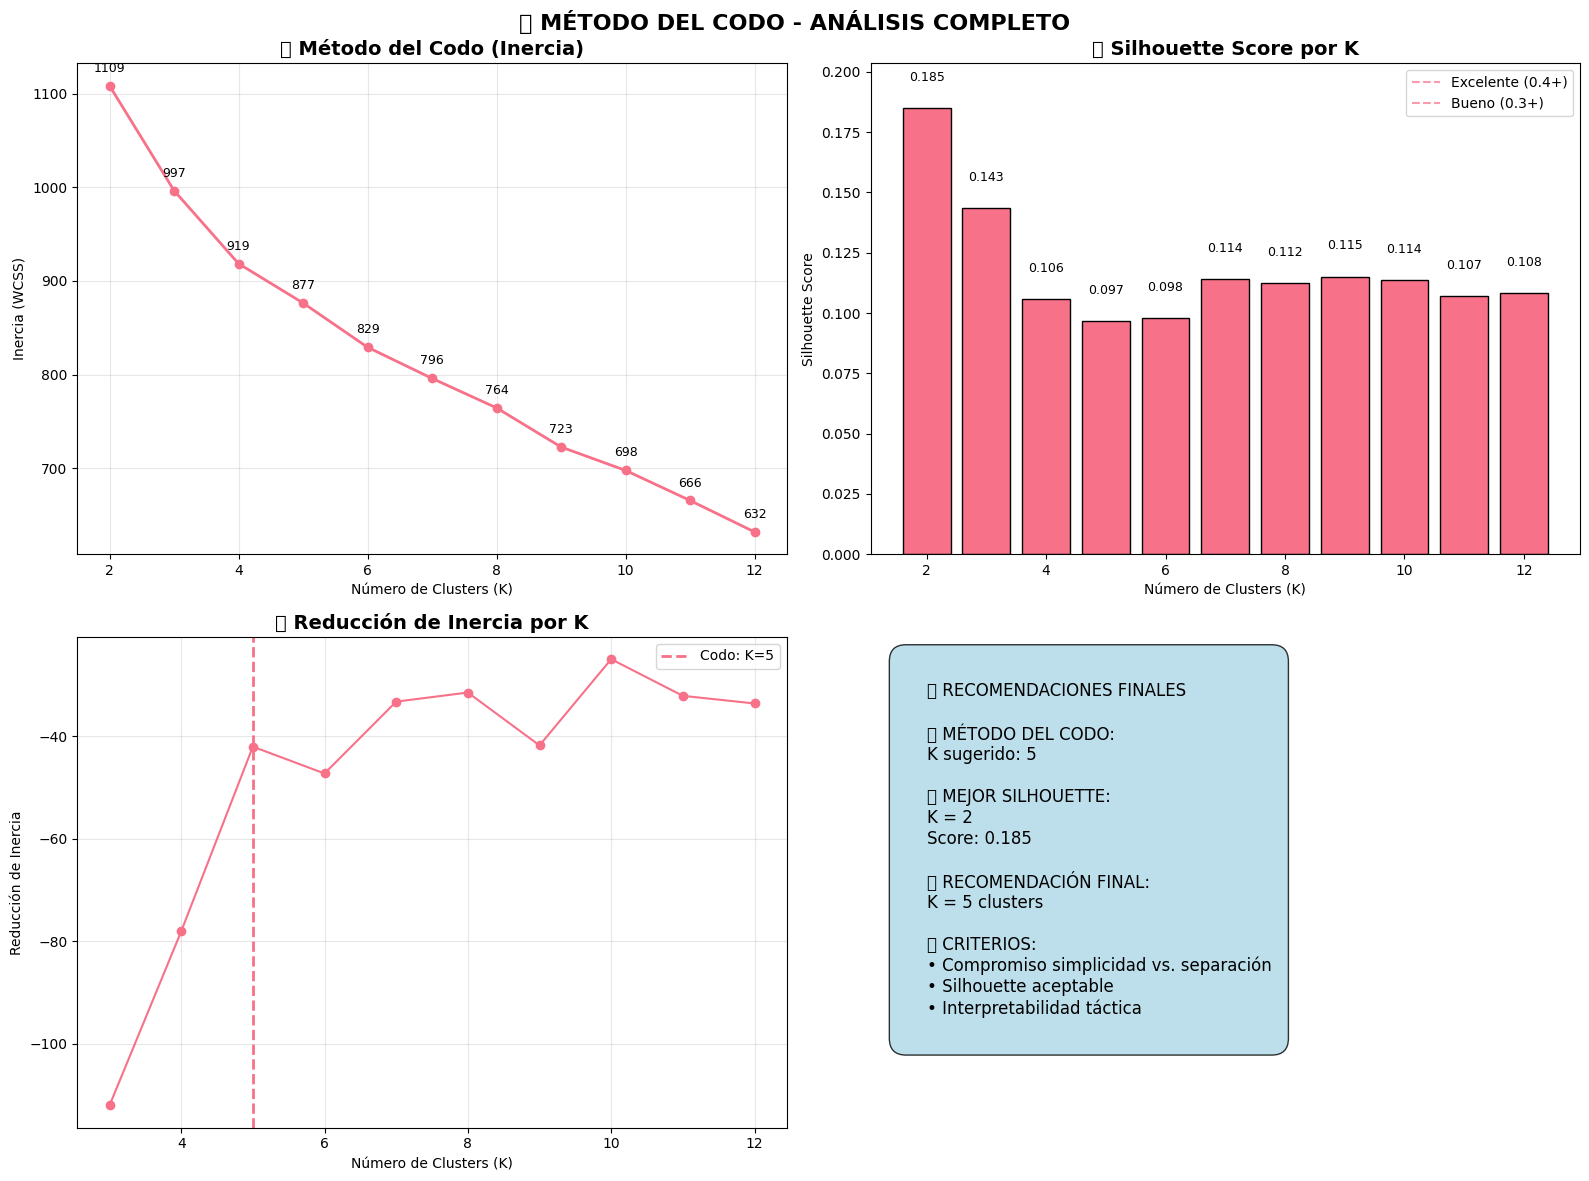


🎯 EJECUTANDO CLUSTERING FINAL CON K=5
✅ Clustering completado
Silhouette Score final: 0.097

📊 Distribución de clusters:
Cluster 0: 16 jugadores (15.5%)
Cluster 1: 22 jugadores (21.4%)
Cluster 2: 10 jugadores (9.7%)
Cluster 3: 26 jugadores (25.2%)
Cluster 4: 29 jugadores (28.2%)


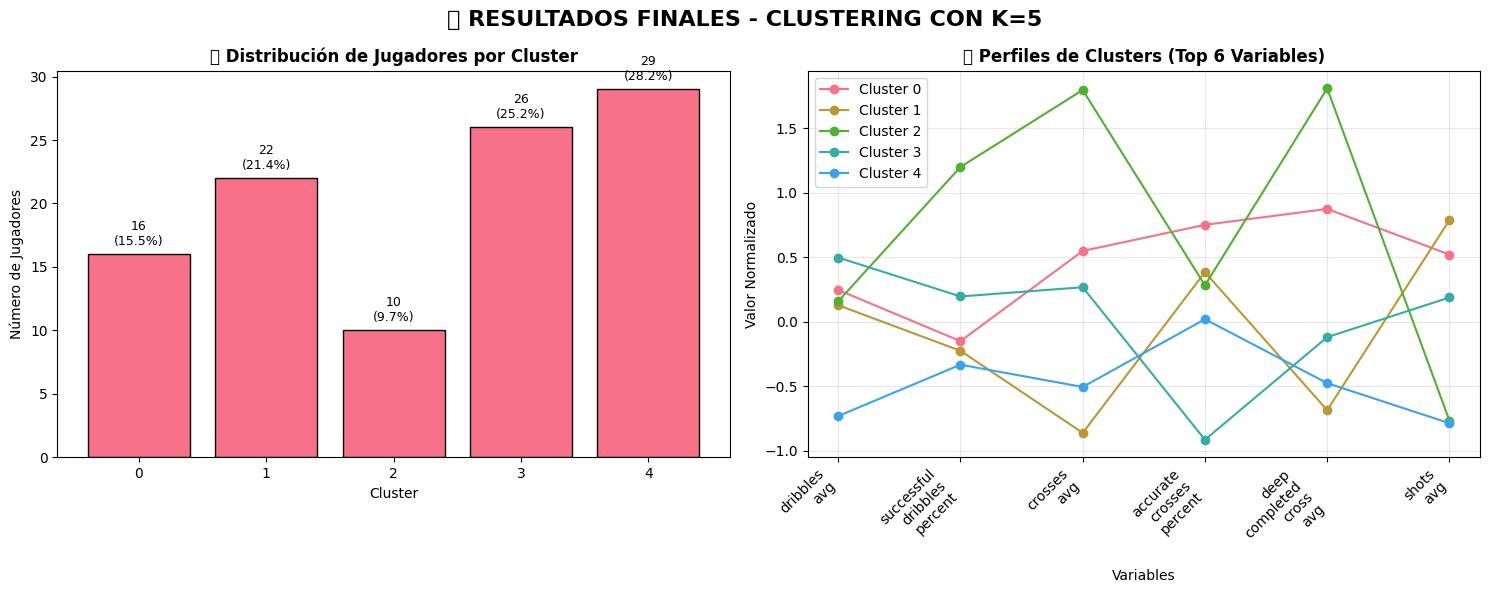


🎉 ¡CLUSTERING COMPLETADO!
Dataset final con 5 clusters listos para análisis


In [33]:
# %% [markdown]
# # Clustering de extremos (versión para Jupyter Notebook)
# 
# - Pega esta celda **después** de ejecutar tu celda de filtrado (la que define `extremos`).
# - Si `extremos` existe en memoria, esta celda ejecutará todo automáticamente y guardará el resultado en `resultado_clustering`.

# %%
from __future__ import annotations

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# =============================================================
# Utilidades
# =============================================================

def _cap_k_range(n_samples: int, k_min: int = 2, k_max: int = 12) -> list[int]:
    """Rango válido de K según n_muestras (evita K>=n)."""
    if n_samples <= k_min:
        return []
    upper = max(k_min, min(k_max, n_samples - 1))
    return list(range(k_min, upper + 1))


def _safe_silhouette(X: np.ndarray, labels: np.ndarray) -> float | np.nan:
    """Silhouette robusto ante clusters degenerados."""
    try:
        return float(silhouette_score(X, labels))
    except Exception:
        return float("nan")


# =============================================================
# 1) Preparación de variables
# =============================================================

def verificar_y_preparar_variables(extremos_df: pd.DataFrame) -> tuple[pd.DataFrame | None, list[str]]:
    """Verifica 13 variables clave y devuelve DF numérico listo."""
    if not isinstance(extremos_df, pd.DataFrame) or extremos_df.empty:
        print("❌ `extremos` vacío o no es DataFrame")
        return None, []

    print("🔍 VERIFICANDO VARIABLES SELECCIONADAS")
    print("=" * 50)

    variables_clustering_final = [
        # REGATE
        "dribbles_avg",
        "successful_dribbles_percent",
        # CENTROS
        "crosses_avg",
        "accurate_crosses_percent",
        "deep_completed_cross_avg",
        # FINALIZACIÓN
        "shots_avg",
        "shots_on_target_percent",
        "xg_shot_avg",
        "non_penalty_goal_avg",
        # CREACIÓN
        "assists_avg",
        "xg_assist_avg",
        "shot_assists_avg",
        "pre_assist_avg",
    ]

    columnas_disponibles = set(extremos_df.columns)
    variables_existentes: list[str] = []
    variables_faltantes: list[str] = []

    for var in variables_clustering_final:
        if var in columnas_disponibles:
            variables_existentes.append(var)
            print(f"✅ {var}")
        else:
            variables_faltantes.append(var)
            print(f"❌ {var} - NO DISPONIBLE")

    print("\n📊 RESUMEN:")
    print(f"Variables encontradas: {len(variables_existentes)}/13")
    print(f"Variables faltantes: {len(variables_faltantes)}")
    if variables_faltantes:
        print(f"⚠️ Faltan: {variables_faltantes}")

    if len(variables_existentes) < 8:
        print(f"❌ Insuficientes variables ({len(variables_existentes)} < 8)")
        return None, []

    df_clustering = extremos_df[variables_existentes].copy()
    df_clustering = df_clustering.apply(pd.to_numeric, errors="coerce").fillna(0)

    if (df_clustering.sum(axis=1) == 0).all():
        print("❌ Todas las filas son 0; no hay señal para clusterizar")
        return None, []

    print("✅ Datos limpios, listos para clustering")
    return df_clustering, variables_existentes


# =============================================================
# 2) Correlaciones
# =============================================================

def visualizar_correlaciones(df_clustering: pd.DataFrame, variables_existentes: list[str]) -> pd.DataFrame:
    """Matriz de correlación y distribución de correlaciones."""
    if df_clustering.shape[1] < 2:
        print("⚠️ Menos de 2 variables: se omite la matriz de correlación")
        return pd.DataFrame()

    print("\n📈 ANÁLISIS DE CORRELACIONES")
    corr_matrix = df_clustering.corr(numeric_only=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle("🔗 ANÁLISIS DE CORRELACIONES ENTRE VARIABLES", fontsize=16, fontweight="bold")

    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="RdBu_r",
        center=0,
        square=True,
        ax=ax1,
        fmt=".2f",
        cbar_kws={"label": "Correlación"},
    )
    ax1.set_title("🌡️ Matriz de Correlación", fontweight="bold", fontsize=14)
    ax1.set_xticklabels([v.replace("_", "\n") for v in variables_existentes], rotation=45, ha="right")
    ax1.set_yticklabels([v.replace("_", "\n") for v in variables_existentes], rotation=0)

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    correlaciones = corr_matrix.where(mask).stack().values
    ax2.hist(correlaciones, bins=20, alpha=0.7, edgecolor="black")
    ax2.set_title("📊 Distribución de Correlaciones", fontweight="bold", fontsize=14)
    ax2.set_xlabel("Valor de Correlación")
    ax2.set_ylabel("Frecuencia")
    ax2.axvline(0, linestyle="--", alpha=0.7, label="Sin correlación")
    media_corr = float(np.nanmean(correlaciones)) if correlaciones.size else float("nan")
    ax2.axvline(media_corr, linestyle="--", alpha=0.7, label=f"Media: {media_corr:.2f}")
    ax2.legend()

    print(f"Correlación promedio: {media_corr:.3f}")
    print(f"Correlación máxima: {float(np.nanmax(correlaciones)) if correlaciones.size else float('nan'):.3f}")
    print(f"Variables muy correlacionadas (>0.7): {int(np.nansum(correlaciones > 0.7)) if correlaciones.size else 0}")

    plt.tight_layout()
    plt.show()
    return corr_matrix


# =============================================================
# 3) Método del codo
# =============================================================

def metodo_del_codo_visual(df_clustering: pd.DataFrame, variables_existentes: list[str]):
    """Calcula K óptimo combinando codo + silhouette, con visualizaciones."""
    print("\n⚙️ APLICANDO MÉTODO DEL CODO")
    print("=" * 40)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clustering)

    print("✅ Datos normalizados (StandardScaler)")
    print(f"Shape final: {X_scaled.shape}")

    K_range = _cap_k_range(n_samples=X_scaled.shape[0], k_min=2, k_max=12)
    if not K_range:
        print("❌ Muy pocas filas para clusterizar (necesitas al menos 3 jugadores)")
        return X_scaled, scaler, 2, [], []

    inercias: list[float] = []
    sils: list[float] = []
    ks: list[int] = []

    print(f"\n🔄 Calculando clusters de {min(K_range)} a {max(K_range)}...")
    for k in K_range:
        try:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X_scaled)
            inercias.append(float(kmeans.inertia_))
            sils.append(_safe_silhouette(X_scaled, labels))
            ks.append(k)
            print(f"K={k:2d}: Inercia={kmeans.inertia_:10.0f}, Silhouette={sils[-1]:.3f}")
        except Exception as e:
            print(f"⚠️ K={k} falló: {e}")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("📐 MÉTODO DEL CODO - ANÁLISIS COMPLETO", fontsize=16, fontweight="bold")

    ax1 = axes[0, 0]
    ax1.plot(ks, inercias, marker="o", linestyle="-", linewidth=2)
    ax1.set_title("📉 Método del Codo (Inercia)", fontweight="bold", fontsize=14)
    ax1.set_xlabel("Número de Clusters (K)")
    ax1.set_ylabel("Inercia (WCSS)")
    ax1.grid(True, alpha=0.3)
    for k, inercia in zip(ks, inercias):
        ax1.annotate(f"{inercia:.0f}", (k, inercia), textcoords="offset points", xytext=(0, 10), ha="center", fontsize=9)

    ax2 = axes[0, 1]
    ax2.bar(ks, sils, edgecolor="black")
    ax2.set_title("📊 Silhouette Score por K", fontweight="bold", fontsize=14)
    ax2.set_xlabel("Número de Clusters (K)")
    ax2.set_ylabel("Silhouette Score")
    y_max = np.nanmax(sils) if len(sils) else 0.5
    if not np.isfinite(y_max):
        y_max = 0.5
    ax2.set_ylim(min(0, np.nanmin(sils) if len(sils) else 0), y_max * 1.1)
    ax2.axhline(y=0.4, linestyle="--", alpha=0.7, label="Excelente (0.4+)")
    ax2.axhline(y=0.3, linestyle="--", alpha=0.7, label="Bueno (0.3+)")
    ax2.legend()
    for k, score in zip(ks, sils):
        if np.isfinite(score):
            ax2.text(k, score + 0.01, f"{score:.3f}", ha="center", va="bottom", fontsize=9)

    ax3 = axes[1, 0]
    dif1 = np.diff(inercias)
    if len(dif1):
        ax3.plot(ks[1:], dif1, marker="o", linestyle="-")
    ax3.set_title("📈 Reducción de Inercia por K", fontweight="bold", fontsize=14)
    ax3.set_xlabel("Número de Clusters (K)")
    ax3.set_ylabel("Reducción de Inercia")
    ax3.grid(True, alpha=0.3)

    k_codo_manual = ks[0] if ks else 2
    if len(inercias) >= 3:
        reducciones = [inercias[i] - inercias[i + 1] for i in range(len(inercias) - 1)]
        cambios = [reducciones[i] - reducciones[i + 1] for i in range(len(reducciones) - 1)]
        if cambios:
            idx = int(np.argmax(cambios)) + 2
            if idx < len(ks):
                k_codo_manual = ks[idx]
                ax3.axvline(x=k_codo_manual, linestyle="--", linewidth=2, label=f"Codo: K={k_codo_manual}")
                ax3.legend()

    ax4 = axes[1, 1]
    ax4.axis("off")
    k_mejor_silhouette = ks[int(np.nanargmax(sils))] if any(np.isfinite(sils)) else k_codo_manual
    mejor_silhouette = (np.nanmax(sils) if any(np.isfinite(sils)) else float("nan"))

    recomendaciones = f"""
    🎯 RECOMENDACIONES FINALES

    📐 MÉTODO DEL CODO:
    K sugerido: {k_codo_manual}

    📊 MEJOR SILHOUETTE:
    K = {k_mejor_silhouette}
    Score: {mejor_silhouette:.3f}

    🏆 RECOMENDACIÓN FINAL:
    K = {k_codo_manual} clusters

    ✅ CRITERIOS:
    • Compromiso simplicidad vs. separación
    • Silhouette aceptable
    • Interpretabilidad táctica
    """
    ax4.text(0.05, 0.95, recomendaciones, transform=ax4.transAxes, fontsize=12, verticalalignment="top",
             bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.show()

    return X_scaled, scaler, k_codo_manual, inercias, sils


# =============================================================
# 4) Clustering final
# =============================================================

def ejecutar_clustering_final(
    X_scaled: np.ndarray,
    k_optimo: int,
    extremos_df: pd.DataFrame,
    variables_existentes: list[str],
):
    """Ejecuta KMeans y devuelve DF etiquetado y modelo."""
    print(f"\n🎯 EJECUTANDO CLUSTERING FINAL CON K={k_optimo}")
    print("=" * 50)

    if X_scaled.shape[0] <= k_optimo:
        print("⚠️ K >= número de muestras; ajustando K")
        k_optimo = max(2, min(X_scaled.shape[0] - 1, k_optimo))

    kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_scaled)

    extremos_clustered = extremos_df.copy()
    extremos_clustered["cluster"] = cluster_labels

    print("✅ Clustering completado")
    sil_final = _safe_silhouette(X_scaled, cluster_labels)
    if np.isfinite(sil_final):
        print(f"Silhouette Score final: {sil_final:.3f}")

    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    print("\n📊 Distribución de clusters:")
    for cluster, count in cluster_counts.items():
        porcentaje = count / len(cluster_labels) * 100
        print(f"Cluster {cluster}: {count} jugadores ({porcentaje:.1f}%)")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f"🎯 RESULTADOS FINALES - CLUSTERING CON K={k_optimo}", fontsize=16, fontweight="bold")

    ax1.bar(cluster_counts.index, cluster_counts.values, edgecolor="black")
    ax1.set_title("📊 Distribución de Jugadores por Cluster", fontweight="bold")
    ax1.set_xlabel("Cluster")
    ax1.set_ylabel("Número de Jugadores")
    for x, y in zip(cluster_counts.index, cluster_counts.values):
        ax1.text(x, y + 0.5, f"{y}\n({y/len(cluster_labels)*100:.1f}%)", ha="center", va="bottom", fontsize=9)

    centroides = kmeans_final.cluster_centers_
    top_vars = variables_existentes[:6]
    top_centroides = centroides[:, : len(top_vars)]

    for i in range(k_optimo):
        ax2.plot(range(len(top_vars)), top_centroides[i], marker="o", linestyle="-", label=f"Cluster {i}")
    ax2.set_title("🎯 Perfiles de Clusters (Top 6 Variables)", fontweight="bold")
    ax2.set_xlabel("Variables")
    ax2.set_ylabel("Valor Normalizado")
    ax2.set_xticks(range(len(top_vars)))
    ax2.set_xticklabels([v.replace("_", "\n") for v in top_vars], rotation=45, ha="right")
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return extremos_clustered, kmeans_final


# =============================================================
# 5) Orquestador (para Jupyter)
# =============================================================

def main(extremos_df: pd.DataFrame):
    print("🚀 INICIANDO ANÁLISIS DE CLUSTERING")
    print("=" * 60)
    try:
        df_clustering, variables_existentes = verificar_y_preparar_variables(extremos_df)
        if df_clustering is None:
            return None
        _ = visualizar_correlaciones(df_clustering, variables_existentes)
        X_scaled, scaler, k_optimo, inercias, sils = metodo_del_codo_visual(df_clustering, variables_existentes)
        extremos_clustered, kmeans_final = ejecutar_clustering_final(X_scaled, k_optimo, extremos_df, variables_existentes)
        print("\n🎉 ¡CLUSTERING COMPLETADO!")
        print(f"Dataset final con {k_optimo} clusters listos para análisis")
        return extremos_clustered, kmeans_final, variables_existentes, scaler
    except Exception as e:
        print(f"❌ Error en clustering: {e}")
        return None


# =============================================================
# 6) EJECUCIÓN AUTOMÁTICA EN NOTEBOOK SI `extremos` YA EXISTE
# =============================================================
if 'extremos' in globals():
    resultado_clustering = main(extremos)
    if resultado_clustering is not None:
        extremos_clustered, kmeans_final, variables_existentes, scaler = resultado_clustering
else:
    print("ℹ️ Define primero `extremos` ejecutando la celda de filtrado.")

📊 MEDIA DE VARIABLES POR CLUSTER


,dribbles_avg,successful_dribbles_percent,crosses_avg,accurate_crosses_percent,deep_completed_cross_avg,shots_avg,shots_on_target_percent,xg_shot_avg,non_penalty_goal_avg,assists_avg,xg_assist_avg,shot_assists_avg,pre_assist_avg
cluster,,,,,,,,,,,,,
0,5.17,51.96,3.68,36.23,1.27,1.87,40.70,0.17,0.21,0.19,0.19,1.32,0.07
1,4.95,51.41,1.79,33.57,0.57,2.01,39.17,0.23,0.21,0.08,0.12,1.02,0.07
2,5.00,61.92,5.36,32.83,1.70,1.18,40.89,0.11,0.07,0.22,0.20,1.49,0.07
3,5.64,54.52,3.30,24.16,0.82,1.69,32.94,0.15,0.12,0.08,0.09,0.81,0.02
4,3.33,50.61,2.27,30.93,0.66,1.17,36.41,0.12,0.09,0.13,0.10,0.95,0.04


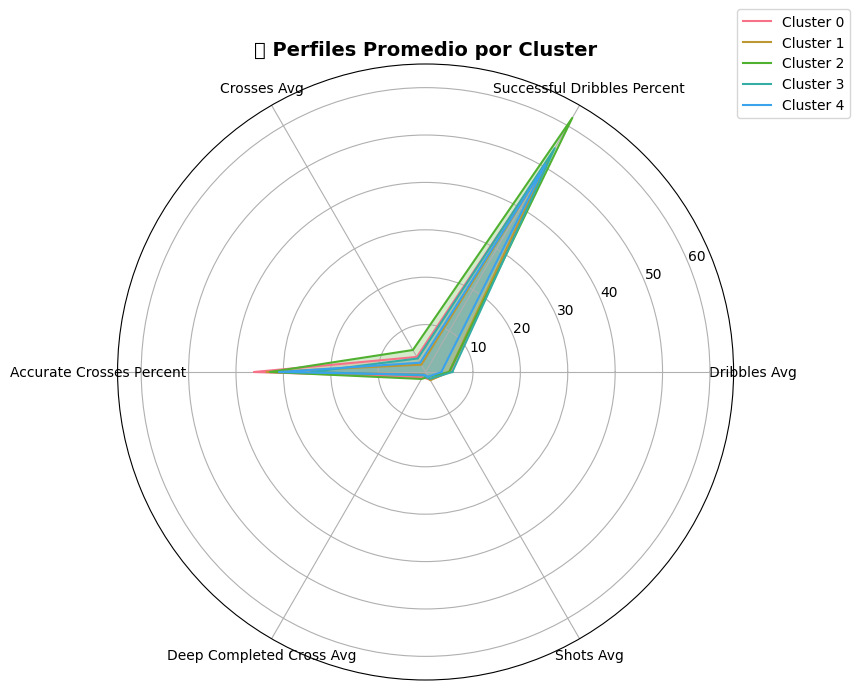


🏆 Top 5 jugadores - Cluster 0


,name,current_team_name,age,minutes_on_field,score
1591,Bebé,Ibiza,35.0,1501,0.776417
401,Martin Pedroarena,Subiza,21.0,924,0.648358
49,Jan Virgili,Barcelona U19,18.0,920,0.567443
717,Victor Valverde,Villarreal B,23.0,3227,0.534420
1312,Pibe,Cultural Leonesa,29.0,2093,0.510997



🏆 Top 5 jugadores - Cluster 1


,name,current_team_name,age,minutes_on_field,score
56,Pablo Garcia,Real Betis U19,19.0,1510,0.598474
55,Pablo García,Betis Deportivo,19.0,1510,0.598474
143,David Mella,Deportivo La Coruña,19.0,981,0.441819
905,Rafa Tresaco,Cultural Leonesa,24.0,2452,0.434034
551,Yeremay Hernández,Deportivo La Coruña,22.0,1244,0.426826



🏆 Top 5 jugadores - Cluster 2


,name,current_team_name,age,minutes_on_field,score
1368,Carlos Calderón,Cultural Leonesa,30.0,1572,0.551809
1169,Guille Perero,NaN,27.0,1399,0.549247
1436,Borja Martínez,Intercity SJ D' Alacant,31.0,2753,0.540476
1237,Dani Vega,Polonia Warszawa,28.0,1270,0.494470
1033,Víctor Narro,Gimnàstic Tarragona,26.0,2785,0.474475



🏆 Top 5 jugadores - Cluster 3


,name,current_team_name,age,minutes_on_field,score
214,Álvaro Leiva,Real Madrid Castilla,20.0,1311,0.558763
953,Asier Córdoba,Miedź Legnica,25.0,2836,0.536560
1234,Zeki Díaz,Marbella,28.0,1558,0.457531
1402,C. Albanis,FC Andorra,30.0,955,0.445036
946,Sergio Sanchís,Yeclano,25.0,1936,0.440313



🏆 Top 5 jugadores - Cluster 4


,name,current_team_name,age,minutes_on_field,score
1192,Javi Moreno,Hércules,28.0,2673,0.424603
784,Pablo Sáenz,Albacete,23.0,958,0.417202
260,M. Sierra,Sevilla Atlético,21.0,1499,0.394997
1246,Rayco Rodríguez,Persita,28.0,2139,0.337793
1255,Ignacio Tellechea,Gimnástica Segoviana,28.0,1774,0.322033


In [35]:
# =============================================================
# 7) ANÁLISIS Y VISUALIZACIÓN DE JUGADORES POR CLUSTER
# =============================================================
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

def _guess_cols(df):
    """Localiza columnas de nombre/equipo/edad/minutos con tolerancia."""
    lower = {c.lower(): c for c in df.columns}
    def pick(opts, fallback=None):
        for o in opts:
            if o in lower: 
                return lower[o]
        return fallback
    name_col = pick(["player_name","name","player","short_name","player_full_name","playershortname"], pick(["player_id","id"]))
    team_col = pick(["current_team_name","team","club","squad","currentteam"])
    age_col = pick(["age"])
    minutes_col = pick(["minutes_on_field","minutes","mins","minutesplayed"])
    return {"name": name_col, "team": team_col, "age": age_col, "minutes": minutes_col}

def resumen_clusters(extremos_clustered, variables_existentes):
    """Media por cluster (solo numéricas)."""
    resumen = extremos_clustered.groupby("cluster")[variables_existentes].mean(numeric_only=True).round(2)
    print("📊 MEDIA DE VARIABLES POR CLUSTER")
    display(resumen)
    return resumen

def top_jugadores_por_cluster(extremos_clustered, top_n=5):
    """Top N por cluster usando un score normalizado (robusto a columnas faltantes)."""
    df = extremos_clustered.copy()
    # columnas identificativas
    cols = _guess_cols(df)
    # variables para score (filtra las que existan)
    vars_for_score = [v for v in ["dribbles_avg","crosses_avg","shots_avg","assists_avg","non_penalty_goal_avg"] if v in df.columns]
    # normalización 0-1 por variable
    for v in vars_for_score:
        vmin, vmax = df[v].min(), df[v].max()
        df[v+"_norm"] = 0.0 if vmax == vmin else (df[v]-vmin)/(vmax-vmin)
    df["score"] = df[[v+"_norm" for v in vars_for_score]].mean(axis=1) if vars_for_score else 0.0

    top = {}
    for c in sorted(df["cluster"].unique()):
        sub = df[df["cluster"] == c].sort_values("score", ascending=False)
        cols_show = [x for x in [cols["name"], cols["team"], cols["age"], cols["minutes"], "score"] if x is not None]
        top[c] = sub[cols_show].head(top_n)
    return top

def visualizar_clusters_radar(resumen, variables_existentes):
    """Radar de medias por cluster (usa primeras 6 variables disponibles)."""
    categorias = [v for v in variables_existentes[:6] if v in resumen.columns]
    if not categorias:
        print("⚠️ No hay variables para el radar."); 
        return
    N = len(categorias)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist(); angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
    for cluster in resumen.index:
        vals = resumen.loc[cluster, categorias].tolist()
        vals += vals[:1]
        ax.plot(angles, vals, label=f"Cluster {cluster}")
        ax.fill(angles, vals, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([c.replace("_"," ").title() for c in categorias])
    ax.set_title("📊 Perfiles Promedio por Cluster", fontsize=14, fontweight="bold")
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()

# ============================
# EJECUTAR
# ============================
resumen = resumen_clusters(extremos_clustered, variables_existentes)
visualizar_clusters_radar(resumen, variables_existentes)

top_jugadores = top_jugadores_por_cluster(extremos_clustered, top_n=5)
for cluster, tabla in top_jugadores.items():
    print(f"\n🏆 Top {len(tabla)} jugadores - Cluster {cluster}")
    display(tabla)

In [36]:
# =============================================================
# 8) ETIQUETADO INTERPRETABLE DE CLUSTERS + TABLAS POR CLUSTER
# =============================================================
from IPython.display import display
import numpy as np
import pandas as pd

# Fallback si no existe en tu notebook
def _guess_cols(df):
    lower = {c.lower(): c for c in df.columns}
    def pick(opts, fb=None):
        for o in opts:
            if o in lower: return lower[o]
        return fb
    return {
        "name":    pick(["player_name","name","player","short_name","player_full_name","playershortname"], pick(["player_id","id"])),
        "team":    pick(["last_club_name","team","club","squad"]),
        "age":     pick(["age"]),
        "minutes": pick(["minutes_on_field","minutes","mins","minutesplayed"]),
    }

# --- 1) Definimos índices tácticos (normalizados) y nombramos clusters ---
def perf_indices(extremos_clustered: pd.DataFrame) -> pd.DataFrame:
    """Crea índices normalizados: Regate, Centro, Finalización, Creación."""
    df = extremos_clustered.copy()
    # Conjunto robusto (usa solo las columnas que existan)
    regate   = [c for c in ["dribbles_avg","successful_dribbles_percent"] if c in df.columns]
    centros  = [c for c in ["crosses_avg","accurate_crosses_percent","deep_completed_cross_avg"] if c in df.columns]
    finaliz  = [c for c in ["shots_avg","xg_shot_avg","non_penalty_goal_avg","shots_on_target_percent"] if c in df.columns]
    creacion = [c for c in ["assists_avg","xg_assist_avg","shot_assists_avg","pre_assist_avg"] if c in df.columns]

    # Normaliza a z-score por variable (evita sesgos de escala)
    def z(x):
        s = x.std(ddof=0)
        return (x - x.mean()) / (s if s not in (0, np.nan) else 1)

    for cols, tag in [(regate,"regate_z"), (centros,"centros_z"), (finaliz,"finaliz_z"), (creacion,"creacion_z")]:
        if cols:
            df[tag] = pd.concat([z(df[c]) for c in cols], axis=1).mean(axis=1)
        else:
            df[tag] = 0.0  # si no hay columnas, no penaliza

    return df

def nombrar_clusters_por_perfil(extremos_clustered: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Asigna nombre interpretable a cada cluster según el índice promedio dominante."""
    dfz = perf_indices(extremos_clustered)
    # Media por cluster de cada índice
    idx_means = dfz.groupby("cluster")[["regate_z","centros_z","finaliz_z","creacion_z"]].mean().round(2)

    # Regla simple: etiqueta = índice dominante (con margen para Mixto)
    etiqueta = {}
    for c, row in idx_means.iterrows():
        best = row.idxmax()
        top2 = row.sort_values(ascending=False).iloc[:2]
        # Si están muy cerca, lo marcamos como Mixto
        if len(top2) == 2 and abs(top2.iloc[0] - top2.iloc[1]) <= 0.15:
            etiqueta[c] = "Mixto"
        else:
            etiqueta[c] = {
                "regate_z":   "Regateador",
                "centros_z":  "Centrador",
                "finaliz_z":  "Finalizador",
                "creacion_z": "Creador",
            }[best]

    # Añade etiqueta al DataFrame
    dfz["cluster_name"] = dfz["cluster"].map(etiqueta)
    return dfz, idx_means

# --- 2) Tablas claras por cluster con TOPs coherentes con el perfil ---
def tablas_por_cluster_interpretable(extremos_clustered: pd.DataFrame, top_n: int = 8) -> dict:
    df_named, idx_means = nombrar_clusters_por_perfil(extremos_clustered)
    cols = _guess_cols(df_named)

    tablas = {}
    for c in sorted(df_named["cluster"].unique()):
        nombre = df_named.loc[df_named["cluster"]==c, "cluster_name"].iloc[0]
        # score para ordenar acorde al perfil
        if nombre == "Regateador":  score_col = "regate_z"
        elif nombre == "Centrador": score_col = "centros_z"
        elif nombre == "Finalizador": score_col = "finaliz_z"
        elif nombre == "Creador":   score_col = "creacion_z"
        else:                       score_col = ["regate_z","centros_z","finaliz_z","creacion_z"]

        sub = df_named[df_named["cluster"] == c].copy()
        if isinstance(score_col, list):
            sub["score_cluster"] = sub[score_col].mean(axis=1)
        else:
            sub["score_cluster"] = sub[score_col]

        cols_show = [x for x in [cols["name"], cols["team"], cols["age"], cols["minutes"]] if x is not None]
        cols_show += ["score_cluster","regate_z","centros_z","finaliz_z","creacion_z"]
        tabla = sub.sort_values("score_cluster", ascending=False)[cols_show].head(top_n)
        tabla = tabla.rename(columns={cols["name"] or "": "player_name",
                                      cols["team"] or "": "team",
                                      cols["age"] or "": "age",
                                      cols["minutes"] or "": "minutes"})
        tablas[(c, nombre)] = tabla.reset_index(drop=True)
    return tablas, idx_means

# --- 3) Resumen ejecutivo para dirección deportiva ---
def resumen_ejecutivo(extremos_clustered: pd.DataFrame) -> pd.DataFrame:
    df_named, idx_means = nombrar_clusters_por_perfil(extremos_clustered)
    conteo = df_named.groupby(["cluster","cluster_name"]).size().rename("n").reset_index()
    # fortalezas (top 2 índices por cluster)
    strengths = []
    for c, row in idx_means.iterrows():
        top2 = row.sort_values(ascending=False).index[:2]
        strengths.append((c, ", ".join([t.replace("_z","").title() for t in top2])))
    strengths = pd.DataFrame(strengths, columns=["cluster","fortalezas"])
    resumen = conteo.merge(strengths, on="cluster").sort_values("cluster")
    return resumen

# ============================
# EJECUTAR Y MOSTRAR
# ============================
tablas, idx_means = tablas_por_cluster_interpretable(extremos_clustered, top_n=8)

print("📌 Perfil (z-score) medio por cluster")
display(idx_means)

print("\n🧭 Resumen ejecutivo (tamaño y fortalezas)")
display(resumen_ejecutivo(extremos_clustered))

for (c, nombre), tabla in tablas.items():
    print(f"\n🏷️ Cluster {c} — {nombre} | Top {len(tabla)} jugadores")
    display(tabla)

📌 Perfil (z-score) medio por cluster


,regate_z,centros_z,finaliz_z,creacion_z
cluster,,,,
0,0.05,0.72,0.45,0.76
1,-0.05,-0.39,0.69,-0.07
2,0.68,1.29,-0.46,0.94
3,0.35,-0.26,-0.15,-0.56
4,-0.53,-0.32,-0.49,-0.19



🧭 Resumen ejecutivo (tamaño y fortalezas)


,cluster,cluster_name,n,fortalezas
0,0,Mixto,16,"Creacion, Centros"
1,1,Finalizador,22,"Finaliz, Regate"
2,2,Centrador,10,"Centros, Creacion"
3,3,Regateador,26,"Regate, Finaliz"
4,4,Mixto,29,"Creacion, Centros"



🏷️ Cluster 0 — Mixto | Top 8 jugadores


,player_name,team,age,minutes,score_cluster,regate_z,centros_z,finaliz_z,creacion_z
0,Bebé,Ibiza,35.0,1501,1.396119,1.528046,1.220242,1.077625,1.758562
1,K. Koné,Ceuta,28.0,1459,0.772259,0.610931,0.628367,0.849368,1.000367
2,Victor Valverde,Villarreal B,23.0,3227,0.712766,0.667029,0.915278,0.754224,0.514535
3,Yeray Cabanzón,Ponferradina,22.0,2994,0.679058,0.221573,0.475210,0.138346,1.881104
4,Martin Pedroarena,Subiza,21.0,924,0.658904,0.542244,0.735359,1.823923,-0.465912
5,Pibe,Cultural Leonesa,29.0,2093,0.638598,0.519984,0.932432,-0.053888,1.155865
6,Jan Virgili,Barcelona U19,18.0,920,0.613613,0.208887,0.303254,1.436918,0.505392
7,Javi López,Sabadell,24.0,1254,0.605649,0.846511,0.265612,0.509579,0.800893



🏷️ Cluster 1 — Finalizador | Top 8 jugadores


,player_name,team,age,minutes,score_cluster,regate_z,centros_z,finaliz_z,creacion_z
0,Pablo García,Betis Deportivo,19.0,1510,1.973145,-0.523123,-0.075697,1.973145,1.121195
1,Pablo Garcia,Real Betis U19,19.0,1510,1.973145,-0.523123,-0.075697,1.973145,1.121195
2,David Mella,Deportivo La Coruña,19.0,981,1.350089,0.313098,-1.187951,1.350089,-0.234376
3,Toni Fernández,Barcelona U19,16.0,1806,1.099728,-0.229333,-0.860156,1.099728,0.079899
4,José de la Rosa,Cádiz B,20.0,933,1.006052,0.260339,-0.841753,1.006052,-0.766518
5,Rayane Belaid,Atlético Madrid B,20.0,2733,0.897089,-0.815542,-0.278753,0.897089,0.179412
6,Iñaki Elejalde,Antequera,26.0,1513,0.858324,-0.098325,-0.788344,0.858324,-0.189907
7,Álvaro Martín,FC Andorra,24.0,2528,0.822588,-0.496996,-0.238968,0.822588,0.284861



🏷️ Cluster 2 — Centrador | Top 8 jugadores


,player_name,team,age,minutes,score_cluster,regate_z,centros_z,finaliz_z,creacion_z
0,J. Biabiany,Antequera,37.0,3102,2.159500,0.848554,2.159500,-0.325980,0.347273
1,Carlos Calderón,Cultural Leonesa,30.0,1572,1.997716,1.200884,1.997716,-0.052574,1.997556
2,Darío Ramírez,Real Sociedad B,20.0,1009,1.993990,0.242625,1.993990,-1.099757,0.248331
3,Dani Vega,Polonia Warszawa,28.0,1270,1.667106,0.715493,1.667106,-0.632499,1.115836
4,Borja Martínez,Intercity SJ D' Alacant,31.0,2753,1.336202,0.557781,1.336202,-0.263903,0.704067
5,Guille Perero,Lugo,27.0,1399,1.319208,1.628726,1.319208,-0.174843,0.789726
6,Álvaro Barbosa,Fuenlabrada,32.0,2084,1.174609,-0.754549,1.174609,-1.247488,0.408766
7,Víctor Narro,Gimnàstic Tarragona,26.0,2785,0.620617,1.219026,0.620617,-0.100150,1.690089



🏷️ Cluster 3 — Regateador | Top 8 jugadores


,player_name,team,age,minutes,score_cluster,regate_z,centros_z,finaliz_z,creacion_z
0,Antonio Zarzana,Volos NFC,23.0,1141,1.306353,1.306353,-0.312719,-0.346442,-0.868789
1,Jorge González,Lugo,21.0,1365,1.126162,1.126162,-0.129779,-1.069261,-0.589244
2,Raúl Dacosta,Barcelona Atlètic,23.0,2225,0.856493,0.856493,-0.378337,-0.372093,-0.094897
3,Zeki Díaz,Marbella,28.0,1558,0.824421,0.824421,0.006096,0.007716,-0.627092
4,Miguel Berlanga,Gimnástica Segoviana,24.0,2957,0.719456,0.719456,-0.408316,-0.646984,-1.224036
5,Álvaro Leiva,Real Madrid Castilla,20.0,1311,0.666010,0.666010,-1.290854,0.429506,-0.407640
6,Josep Cerdà,FC Andorra,22.0,2544,0.592882,0.592882,-0.486645,-0.050767,-0.669932
7,I. Moreno,Unionistas de Salamanca,28.0,1605,0.591042,0.591042,0.716670,-0.965256,-0.139985



🏷️ Cluster 4 — Mixto | Top 8 jugadores


,player_name,team,age,minutes,score_cluster,regate_z,centros_z,finaliz_z,creacion_z
0,Javi Moreno,Hércules,28.0,2673,0.160830,0.575597,0.538041,-0.462468,-0.007849
1,Nico Espinosa,Hércules,24.0,2574,0.129497,-0.153405,-0.314007,0.359754,0.625646
2,M. Sierra,Sevilla Atlético,21.0,1499,0.062584,0.185195,-0.402327,-0.070129,0.537598
3,Pablo Sáenz,Albacete,23.0,958,0.048937,0.101350,-0.535385,-0.216470,0.846255
4,A. Gil,Ourense CF,28.0,1897,-0.098102,-0.287424,0.422301,-0.699498,0.172214
5,J. Raigal,Ourense CF,25.0,1732,-0.107671,0.542088,-0.105380,-0.539876,-0.327515
6,Aitor Aranzabe,Real Unión,26.0,2490,-0.239573,0.302603,0.236353,-0.896875,-0.600373
7,Alberto Solís,FC Andorra,27.0,1351,-0.240231,-0.103044,-0.101206,-0.506130,-0.250544


In [53]:
# =============================================================
# 10) REPORTE PDF DE CLUSTERS INTERPRETABLES (formato KPI + multi-página)
# Requiere:
#   - funciones de la sección #8 ya ejecutadas (tablas_por_cluster_interpretable, resumen_ejecutivo)
#   - variables: extremos_clustered
#   - módulo: reporte_fpdf.PDF con métodos add_portada, add_index_page, add_full_page_image
# =============================================================
import os
from io import BytesIO
import base64
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd

# Importa tu clase PDF y el directorio de salida
# from reporte_fpdf import PDF, PDF_OUTPUT_DIR

# --- Configuración de portada/contraportada ---
LOGO_PATH = "/Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/IMG_2027-removebg-preview.png"
COVER_TITLE = "Busqueda de extremos mediante clustering"
CLOSING_IMAGE = "/Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Estadio_Unionistas.jpg"  # cámbialo si tienes una imagen de contraportada

# --- Utilidad para caracteres fuera de latin-1 (FPDF estándar) ---
def clean_text_latin1(text: str) -> str:
    return str(text).encode("latin-1", "replace").decode("latin-1")

# ========= 1) Tabla KPI con estilo solicitado (devuelve PNG bytes) =========
def create_kpi_table_image(data: dict) -> bytes:
    """
    Genera UNA imagen PNG de tabla con el estilo KPI indicado.
    `data` debe ser un dict con las columnas en el orden deseado.
    """
    # Estilo
    header_color = '#1E2A3B'
    odd_row_color = '#F2F2F2'
    even_row_color = '#FFFFFF'

    # Preparar datos
    columns = list(data.keys())
    rows = list(zip(*data.values()))
    n_rows = len(rows)

    # Tamaño de figura: alto proporcional a nº de filas (header ocupa más)
    # Ajusta el factor si quieres filas más altas/bajas
    per_row = 0.42
    fig_h = max(2.0, n_rows * per_row + 1.0)
    fig, ax = plt.subplots(figsize=(17, fig_h))
    ax.axis('off')
    ax.axis('tight')

    # Crear tabla
    table = ax.table(
        cellText=rows,
        colLabels=columns,
        loc='center',
        cellLoc='center',
    )

    # Estilo base
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.18)

    # Anchos por columna (ranking, jugador, equipo, edad, minutos, score)
    # Ajusta si cambias el número de columnas
    col_widths = [0.06, 0.34, 0.25, 0.08, 0.12, 0.10]
    for j, w in enumerate(col_widths[:len(columns)]):
        table.auto_set_column_width(j)
        # set_width solo afecta a celdas concretas; ajustamos por cada fila
        for i in range(n_rows + 1):  # +1 por el header (fila 0 interna de mpl_table)
            cell = table.get_celld()[(i, j)]
            cell.set_width(w)

    # Pintar celdas (header y filas alternadas)
    for (i, j), cell in table.get_celld().items():
        cell.set_edgecolor('none')
        if i == 0:  # Header
            cell.set_facecolor(header_color)
            cell.set_text_props(weight='bold', color='white', fontsize=11)
            cell.set_height(cell.get_height() * 1.9)
        else:
            # Alternancia
            cell.set_facecolor(odd_row_color if i % 2 == 1 else even_row_color)
            cell.set_height(cell.get_height() * 1.35)

            # Alineaciones por columna
            if j == 0:            # Ranking
                cell.set_text_props(ha='center')
            elif j in (1, 2):     # Jugador, Equipo
                cell.set_text_props(ha='left')
            else:                 # Edad, Minutos, Score
                cell.set_text_props(ha='center')

    # Exportar a PNG (bytes)
    buf = BytesIO()
    plt.savefig(buf, format='png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    return buf.getvalue()

# ========= 2) Partidor de tabla en varias páginas manteniendo encabezado =========
def create_kpi_table_pages(data: dict, rows_per_page: int = 22) -> list[bytes]:
    """
    Divide los datos en páginas, generando múltiples imágenes PNG (bytes).
    Mantiene siempre el encabezado.
    """
    total_rows = len(next(iter(data.values())))
    images = []
    for start in range(0, total_rows, rows_per_page):
        end = start + rows_per_page
        sub = {k: v[start:end] for k, v in data.items()}
        images.append(create_kpi_table_image(sub))
    return images

# ========= 3) Construcción del PDF con portada, índice, resumen y tablas =========
def export_pdf_clusters_kpi(extremos_clustered: pd.DataFrame, rows_per_page: int = 22) -> str:
    # Asegura salida
    os.makedirs(PDF_OUTPUT_DIR, exist_ok=True)

    # Tablas interpretables (usa funciones de la sección #8 que ya tienes cargadas)
    tablas, idx_means = tablas_por_cluster_interpretable(extremos_clustered, top_n=None)

    # PDF
    pdf = PDF()
    pdf.add_portada(clean_text_latin1(COVER_TITLE), logo_path=LOGO_PATH)

    # Índice
    # pdf.add_index_page([clean_text_latin1(f"Cluster {c} - {nombre}") for (c, nombre) in tablas.keys()])

    # Resumen ejecutivo
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, clean_text_latin1("Resumen Ejecutivo"), ln=True, align="C")
    pdf.ln(6)
    pdf.set_font("Arial", "", 12)
    resumen = resumen_ejecutivo(extremos_clustered)
    for _, row in resumen.iterrows():
        line = f"Cluster {row['cluster']} - {row['cluster_name']} | N={row['n']} | Fortalezas: {row['fortalezas']}"
        pdf.cell(0, 8, clean_text_latin1(line), ln=True)

    # Una página con medias z-score por cluster (pequeña tabla en imagen)
    try:
        fig, ax = plt.subplots(figsize=(8, 2 + 0.35 * len(idx_means)))
        ax.axis('off')
        ax.axis('tight')
        tbl = ax.table(cellText=idx_means.reset_index().values,
                       colLabels=["cluster", "regate_z", "centros_z", "finaliz_z", "creacion_z"],
                       loc="center", cellLoc="center")
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(9)
        tbl.scale(1, 1.2)
        tmp_path = os.path.join(PDF_OUTPUT_DIR, "idx_means.png")
        plt.savefig(tmp_path, dpi=300, bbox_inches="tight")
        plt.close(fig)
        pdf.add_page()
        pdf.set_font("Arial", "B", 14)
        pdf.cell(0, 10, clean_text_latin1("Perfil (z-score) medio por cluster"), ln=True, align="C")
        pdf.image(tmp_path, x=40, y=35, w=220)
    except Exception:
        pass

    # Tablas de cada cluster (KPI style; multi-página)
    for (c, nombre), tabla in tablas.items():
        # Portadilla del cluster
        pdf.add_page()
        pdf.set_font("Arial", "B", 14)
        pdf.cell(0, 10, clean_text_latin1(f"Cluster {c} - {nombre}"), ln=True, align="C")
        pdf.ln(4)

        # Construir datos para la tabla KPI
        data = {
            "Ranking": list(range(1, len(tabla) + 1)),
            "Jugador": [clean_text_latin1(x) for x in tabla["player_name"].astype(str).tolist()],
            "Equipo":  [clean_text_latin1(x) for x in tabla["team"].astype(str).tolist()],
            "Edad":    [f"{x:.0f}" if pd.notna(x) else "-" for x in tabla["age"].tolist()],
            "Minutos": [f"{int(x):d}" if pd.notna(x) else "-" for x in tabla["minutes"].tolist()],
            "Score":   [f"{x:.2f}" if pd.notna(x) else "-" for x in tabla["score_cluster"].tolist()],
        }

        # Generar páginas de tabla
        table_imgs = create_kpi_table_pages(data, rows_per_page=rows_per_page)

        # Insertar cada imagen en el PDF (una por página)
        for idx, img_bytes in enumerate(table_imgs, start=1):
            # En la misma página de cabecera metemos la primera tabla; las demás, páginas nuevas
            if idx > 1:
                pdf.add_page()
                pdf.set_font("Arial", "B", 14)
                pdf.cell(0, 10, clean_text_latin1(f"Cluster {c} - {nombre} (cont.)"), ln=True, align="C")
                pdf.ln(4)

            img_path = os.path.join(PDF_OUTPUT_DIR, f"cluster_{c}_{idx}.png")
            with open(img_path, "wb") as f:
                f.write(img_bytes)

            # Ajuste de tamaño/posición para no cortar
            pdf.image(img_path, x=15, y=35, w=265)

    # Contraportada
    if os.path.exists(CLOSING_IMAGE):
        pdf.add_full_page_image(CLOSING_IMAGE)

    # Guardar
    out_path = os.path.join(PDF_OUTPUT_DIR, "informe_clusters.pdf")
    pdf.output(out_path)
    print(f"✅ Reporte exportado en: {out_path}")
    return out_path

# =========================
# EJECUTAR
# =========================
# Asegúrate de haber corrido antes la sección #8 para tener las funciones y `extremos_clustered`
export_pdf_clusters_kpi(extremos_clustered, rows_per_page=22)

[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
[Success] Logo cargado: /Users/macmontxinho/Desktop/Teams/Wyscout/figures/logos/Escudo_Of.png
✅ Reporte exportado en: pdf_exports/informe_clusters.pdf


'pdf_exports/informe_clusters.pdf'